# SuperAI Season 4 - Level 2 Hackathon - Forest Type Image Classification

## Explore Data

In [189]:
import pandas as pd

In [190]:
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

In [191]:
def add_features(row) :

    row['NDVI'] = (row['b8'] - row['b4']) / (row['b8'] + row['b4'])
    row['GNDVI '] = (row['b8'] - row['b3']) / (row['b8'] + row['b3'])
    row['NDRE '] = (row['b8'] - row['b5']) / (row['b8'] + row['b5'])
    # row['MSAVI2'] = (2 * row['b8'] + 1 - ( (2 * row['b8'] + 1) - 8 * (row['b8'] - row['b4']) ) ** (1 / 2) ) / 2
    
    return row

In [192]:
train_df = train_df.apply(add_features , axis = 1)
test_df = test_df.apply(add_features , axis = 1)

In [193]:
train_df

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,nforest_type,NDVI,GNDVI,NDRE
0,2002,293,1927,1038,278,475,453,987,1773,2184,1900,2343,3039,MDF,0.614960,0.600000,0.316245
1,3212,197,1598,697,201,347,228,682,1982,2449,2254,2685,2690,DDF,0.816277,0.733180,0.535422
2,13312,929,1975,1031,982,1020,856,1220,2051,2421,2392,2671,2683,MDF,0.472906,0.402110,0.324474
3,17020,132,1560,689,189,408,175,609,2117,2907,3024,3005,2955,MDF,0.890591,0.762238,0.664740
4,5967,241,1944,1131,362,538,487,918,1549,1844,1702,2077,2043,MDF,0.555048,0.519643,0.299237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13048,9185,374,1940,1054,382,565,498,977,1678,1929,2109,2291,2100,DDF,0.617952,0.577412,0.366818
13049,13977,1983,3602,2720,1622,1782,1766,2314,3488,3900,3924,4097,6053,DDF,0.379262,0.375394,0.258096
13050,755,940,2007,1148,975,1080,968,1252,1780,1983,1942,2247,2170,DDF,0.334708,0.285242,0.216030
13051,1616,1174,2312,1190,1112,1126,889,1310,2511,3085,3050,3396,3380,MDF,0.548616,0.460728,0.399083


In [194]:
test_df

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,NDVI,GNDVI,NDRE
0,13467.0,69.0,1425.0,693.0,312.0,524.0,376.0,847.0,1821.0,2356.0,2378.0,2611.0,2595.0,0.726943,0.638870,0.474729
1,12719.0,242.0,1514.0,691.0,343.0,522.0,324.0,718.0,1730.0,2178.0,2472.0,2359.0,2582.0,0.768240,0.651303,0.549843
2,1054.0,218.0,2354.0,1118.0,292.0,596.0,410.0,965.0,2586.0,3226.0,3371.0,3645.0,3149.0,0.783126,0.699521,0.554889
3,13747.0,350.0,2013.0,1134.0,306.0,572.0,475.0,982.0,1754.0,1935.0,2275.0,2290.0,2345.0,0.654545,0.598174,0.396991
4,9453.0,185.0,1450.0,712.0,293.0,440.0,384.0,673.0,1487.0,1965.0,2213.0,2200.0,2193.0,0.704274,0.668300,0.533611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,115.0,447.0,1686.0,811.0,425.0,661.0,441.0,958.0,2432.0,2891.0,2966.0,3126.0,3312.0,0.741121,0.635511,0.511723
3996,10654.0,252.0,2694.0,1503.0,470.0,778.0,753.0,1294.0,2334.0,2656.0,2679.0,3212.0,2856.0,0.561189,0.549899,0.348603
3997,5718.0,233.0,1486.0,618.0,249.0,409.0,260.0,699.0,2188.0,2831.0,3030.0,3086.0,3087.0,0.841945,0.762140,0.625101
3998,13054.0,221.0,1840.0,774.0,245.0,441.0,231.0,703.0,2491.0,3453.0,3284.0,3762.0,3161.0,0.868563,0.763221,0.647354


In [251]:
train_df[train_df['nforest_type'] == 'MDF'].describe()

,id,b1,b11,b12,b2,b3,b4,b5,b6,b7,b8,b8_a,b9,NDVI,GNDVI,NDRE
count,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000,5865.000000
mean,8573.159761,361.555840,1899.192157,966.516113,414.680477,604.626257,467.078772,932.333163,2100.767093,2569.092413,2656.595226,2863.444160,2881.280648,0.705704,0.633759,0.481258
std,4910.649058,312.275357,325.290733,262.112506,322.187141,296.766032,305.725238,306.676770,367.364224,465.167028,512.642611,487.694071,443.845932,0.158156,0.135183,0.132456
min,6.000000,0.000000,371.000000,154.000000,1.000000,98.000000,53.000000,138.000000,519.000000,726.000000,706.000000,750.000000,786.000000,0.091995,0.054210,0.001797
25%,4286.000000,185.000000,1678.000000,776.000000,228.000000,422.000000,259.000000,712.000000,1846.000000,2243.000000,2308.000000,2522.000000,2578.000000,0.619692,0.570759,0.395312
50%,8541.000000,250.000000,1907.000000,934.000000,295.000000,513.000000,364.000000,862.000000,2079.000000,2534.000000,2630.000000,2840.000000,2855.000000,0.753109,0.672727,0.503781
75%,12895.000000,413.000000,2123.000000,1125.000000,469.000000,707.000000,580.000000,1109.000000,2339.000000,2866.000000,2983.000000,3173.000000,3163.000000,0.825985,0.731187,0.584805
max,17051.000000,2616.000000,4110.000000,3590.000000,2480.000000,2554.000000,2504.000000,3105.000000,3978.000000,4940.000000,4848.000000,5027.000000,8329.000000,0.922094,0.842777,0.765421


## Image Representation

### Represent as RGBs

In [233]:
import matplotlib.pyplot as plt
import numpy as np

In [234]:
train_df.iloc[0]

id                  2002
b1                   293
b11                 1927
b12                 1038
b2                   278
b3                   475
b4                   453
b5                   987
b6                  1773
b7                  2184
b8                  1900
b8_a                2343
b9                  3039
nforest_type         MDF
NDVI             0.61496
GNDVI                0.6
NDRE            0.316245
Name: 0, dtype: object

In [235]:
image = np.array( [ [train_df.iloc[0]['b4'] , train_df.iloc[0]['b3'] , train_df.iloc[0]['b2'] ] ])

In [236]:
image

array([[453, 475, 278]], dtype=int64)

In [237]:
size = 100

In [238]:
x = np.stack([ np.array( [ [train_df.iloc[idx]['b4'] , train_df.iloc[idx]['b3'] , train_df.iloc[idx]['b2'] ] ] ) for idx in range(size)])
y = [train_df.iloc[idx]['nforest_type'] for idx in range(size)]

In [239]:
x.shape

(100, 1, 3)

In [240]:
x = np.reshape(x, (size , 1 , 1 , 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


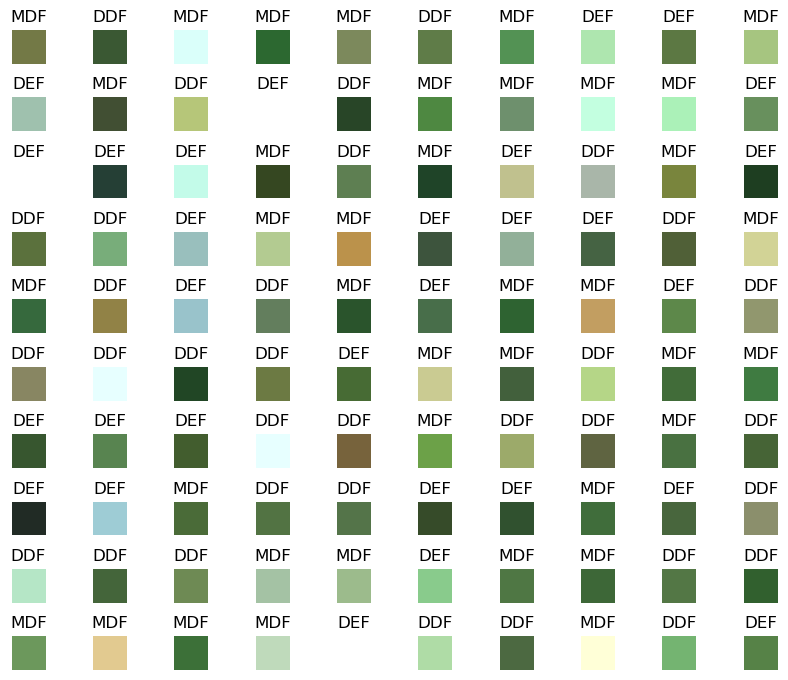

In [241]:
fig, axes = plt.subplots(nrows = 10, ncols=10, figsize=(10, 8))

for idx in range(100) :

    axes[idx // 10 ,idx % 10].imshow(x[idx] / 1000)
    axes[idx // 10 ,idx % 10].axis('off')
    axes[idx // 10 ,idx % 10].set_title(y[idx])

fig.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1, hspace=1)

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

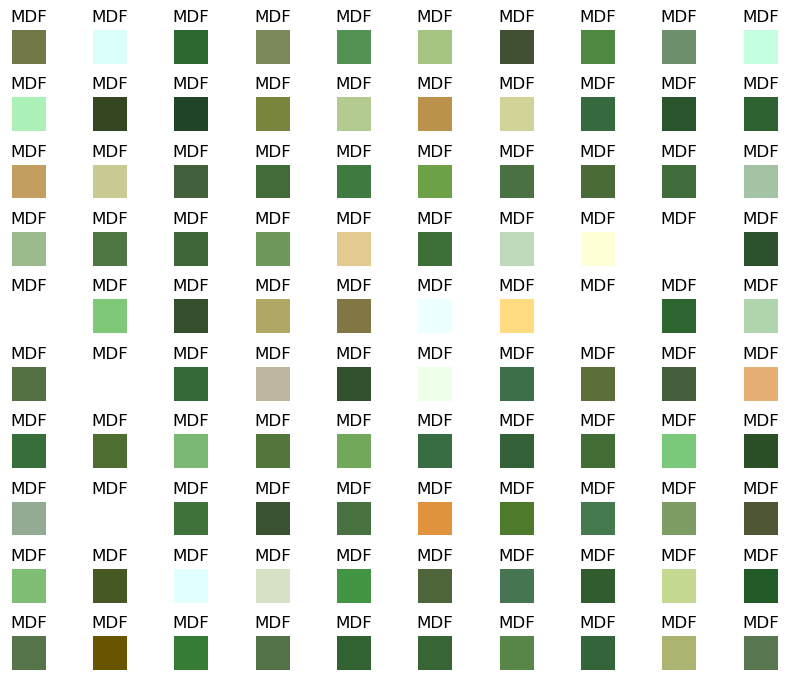

In [246]:
MDF_df = train_df[train_df['nforest_type'] == 'MDF']

MDF_df.iloc[0]

size = 100

x = np.stack([ np.array( [ [MDF_df.iloc[idx]['b4'] , MDF_df.iloc[idx]['b3'] , MDF_df.iloc[idx]['b2'] ] ] ) for idx in range(size)])
y = [MDF_df.iloc[idx]['nforest_type'] for idx in range(size)]

x = np.reshape(x, (size , 1 , 1 , 3))

fig, axes = plt.subplots(nrows = 10, ncols=10, figsize=(10, 8))

for idx in range(100) :

    axes[idx // 10 ,idx % 10].imshow(x[idx] / 1000)
    axes[idx // 10 ,idx % 10].axis('off')
    axes[idx // 10 ,idx % 10].set_title(y[idx])

fig.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1, hspace=1)

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


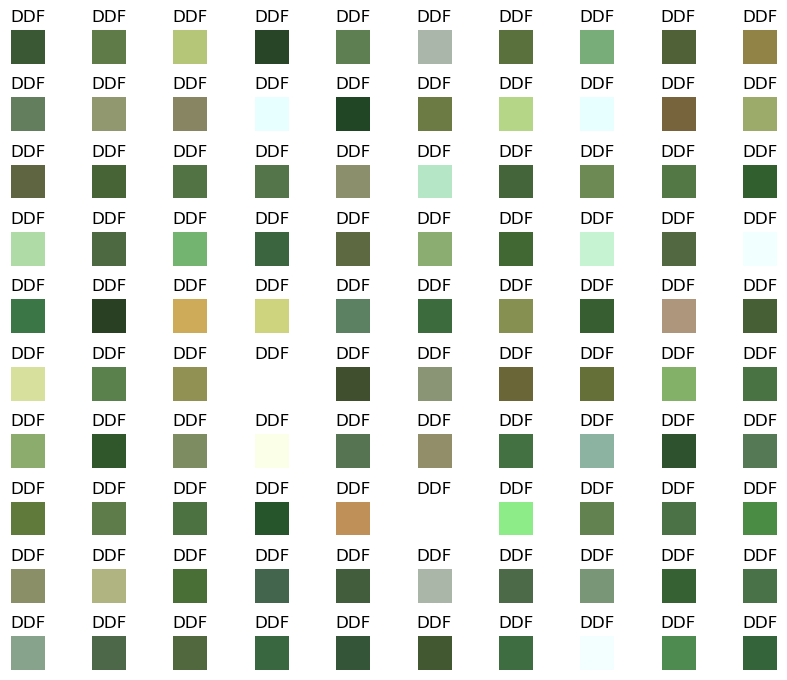

In [247]:
DDF_df = train_df[train_df['nforest_type'] == 'DDF']

DDF_df.iloc[0]

size = 100

x = np.stack([ np.array( [ [DDF_df.iloc[idx]['b4'] , DDF_df.iloc[idx]['b3'] , DDF_df.iloc[idx]['b2'] ] ] ) for idx in range(size)])
y = [DDF_df.iloc[idx]['nforest_type'] for idx in range(size)]

x = np.reshape(x, (size , 1 , 1 , 3))

fig, axes = plt.subplots(nrows = 10, ncols=10, figsize=(10, 8))

for idx in range(100) :

    axes[idx // 10 ,idx % 10].imshow(x[idx] / 1000)
    axes[idx // 10 ,idx % 10].axis('off')
    axes[idx // 10 ,idx % 10].set_title(y[idx])

fig.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1, hspace=1)

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


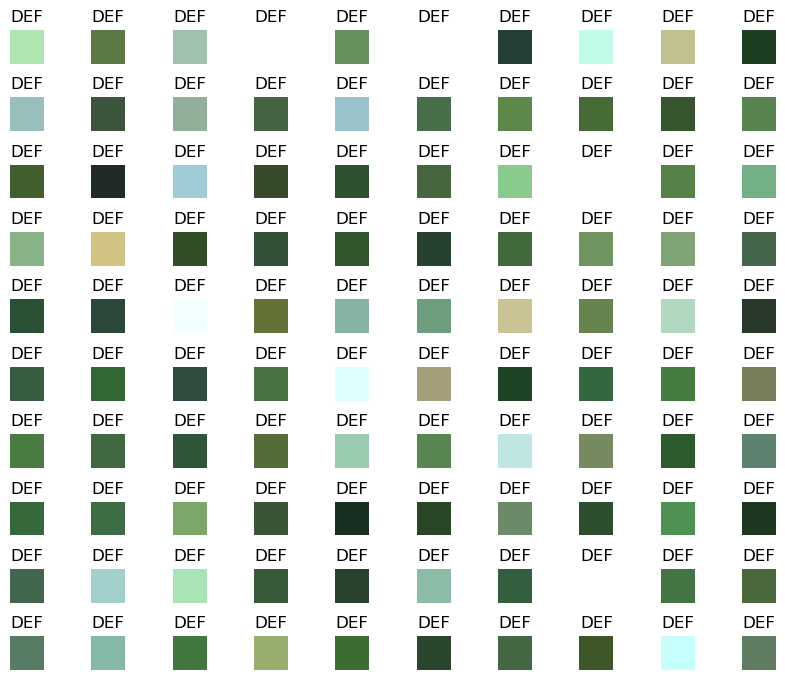

In [249]:
DEF_df = train_df[train_df['nforest_type'] == 'DEF']

DEF_df.iloc[0]

size = 100

x = np.stack([ np.array( [ [DEF_df.iloc[idx]['b4'] , DEF_df.iloc[idx]['b3'] , DEF_df.iloc[idx]['b2'] ] ] ) for idx in range(size)])
y = [DEF_df.iloc[idx]['nforest_type'] for idx in range(size)]

x = np.reshape(x, (size , 1 , 1 , 3))

fig, axes = plt.subplots(nrows = 10, ncols=10, figsize=(10, 8))

for idx in range(100) :

    axes[idx // 10 ,idx % 10].imshow(x[idx] / 1000)
    axes[idx // 10 ,idx % 10].axis('off')
    axes[idx // 10 ,idx % 10].set_title(y[idx])

fig.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1, hspace=1)

plt.show()